## MNIST-Handwritten-Digits-Recognition-Using-Deep-Neural-Network

#### Part 1: Data Preprocessing

In [2]:
# import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# import the minist dataset from tensorflow
mnist = tf.keras.datasets.mnist   # 28x28 images of hand-written digits 0-9

In [4]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# actual data pass through the neural network
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

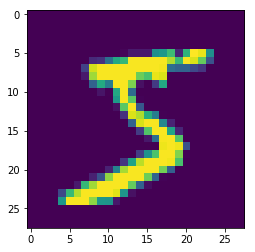

In [6]:
# image of the above data
plt.imshow(x_train[0])
plt.show()

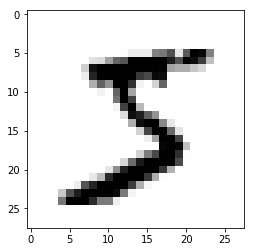

In [7]:
# binary form of above image
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [8]:
# normalize the image data to scale pixel value between 0-1 instead of 0-255
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

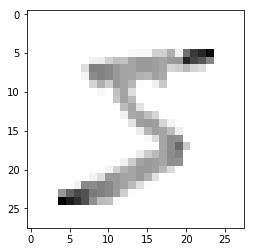

In [9]:
# actual data to pass through the neural network
print(x_train[0])
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

#### Part 2: Building the Deep Neural Network

In [10]:
# Model = Sequential -> feed forward the image
model = tf.keras.models.Sequential()

In [11]:
# input layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

In [12]:
# hidden layers -> 128 neurons in each layer with rectified linear unit as activation function
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

In [13]:
# output layer -> 10 neurons with softmax activation function for probability distribution 
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [14]:
# Define parameters for the training of the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
# Run the model
model.fit(x_train, y_train, epochs= 25)

Epoch 1/25
60000/60000 [==============================] - 11s 185us/step - loss: 0.2580 - acc: 0.9249
Epoch 2/25
60000/60000 [==============================] - 9s 144us/step - loss: 0.1050 - acc: 0.9680
Epoch 3/25
60000/60000 [==============================] - 11s 186us/step - loss: 0.0732 - acc: 0.9769
Epoch 4/25
60000/60000 [==============================] - 10s 164us/step - loss: 0.0529 - acc: 0.9832
Epoch 5/25
60000/60000 [==============================] - 9s 152us/step - loss: 0.0410 - acc: 0.9864
Epoch 6/25
60000/60000 [==============================] - 8s 130us/step - loss: 0.0306 - acc: 0.9896
Epoch 7/25
60000/60000 [==============================] - 9s 144us/step - loss: 0.0260 - acc: 0.9910
Epoch 8/25
60000/60000 [==============================] - 10s 165us/step - loss: 0.0213 - acc: 0.9925
Epoch 9/25
60000/60000 [==============================] - 9s 148us/step - loss: 0.0178 - acc: 0.9939
Epoch 10/25
60000/60000 [==============================] - 8s 135us/step - loss: 0.0156

In [16]:
# Run the model on test set
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 63us/step
0.16990897232599583 0.9756


#### Part 2: Predict the Result

In [17]:
# Save model
model.save('number_reader.model')

In [18]:
# Load model for predictions
new_model = tf.keras.models.load_model('number_reader.model')

In [20]:
# Predictions
predictions = new_model.predict([x_test])
predictions

array([[3.65782753e-26, 1.17447506e-20, 2.14909630e-18, ...,
        1.00000000e+00, 2.55297654e-22, 6.49138912e-21],
       [0.00000000e+00, 1.96304071e-17, 1.00000000e+00, ...,
        2.02190227e-26, 5.95542914e-27, 0.00000000e+00],
       [5.93028658e-20, 1.00000000e+00, 2.01546699e-16, ...,
        4.80896746e-11, 4.02012201e-10, 3.44516490e-17],
       ...,
       [5.64185494e-23, 8.60549052e-16, 4.82040601e-20, ...,
        8.12523809e-14, 6.16473018e-14, 6.61817150e-17],
       [5.65977372e-21, 2.72002238e-24, 6.53066882e-25, ...,
        1.84611343e-23, 9.06083319e-10, 6.42122538e-20],
       [3.28757839e-15, 1.25981282e-18, 1.26621657e-17, ...,
        1.25297580e-22, 3.15684706e-16, 2.54308476e-27]], dtype=float32)

In [21]:
# Predict number at 0 index in the array
print(np.argmax(predictions[0]))

7


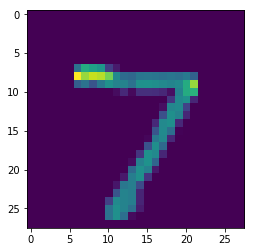

In [22]:
plt.imshow(x_test[0])
plt.show()

In [23]:
print(np.argmax(predictions[2]))

1


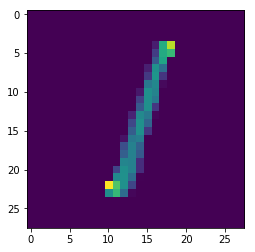

In [24]:
plt.imshow(x_test[2])
plt.show()

In [25]:
print(np.argmax(predictions[4]))

4


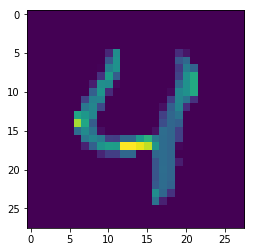

In [27]:
plt.imshow(x_test[4])
plt.show()